Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

# Getting Started with Neptune Analytics

## Table Of Contents

* [Introduction](#Introduction)
* [Check Connection to the Graph](#Check-Connection-to-the-Graph)
* [Getting Help](#Getting-Help)
* [Loading Data](#Loading-Data)
* [Example openCypher Queries](#Example-openCypher-Queries)  
* [Next Steps](#Next-Steps)

## Introduction

Data scientists and developers looking to explore and interact with graph data to derive insights will find the features of Neptune Analytics a solid fit for these types of projects.  Neptune Analytics is optimized to load large amounts of data, run graph algorithms, issue analytic queries, and perform vector search.


When combined with Neptune Notebooks, Neptune Analytics empowers users to interact with data using familiar tools, such as Pandas, Jupyter, and Python, to discover and pinpoint interactions and patterns of behavior in the data that are indicative of fraud, illegal activities, optimization opportunities etc.


As an introductory guide, this notebook will guide you through some of the most common steps you will perform when working on these projects.  

1. Loading data to a Neptune Analytics graph
2. Running openCypher queries and algorithms
3. Visualizing the results

## Check Connection to the Graph

Let's start by first validating the connection by checking the status API endpoint of your graph.

In [ ]:
%opencypher_status

Examining the response we should see that the graph returns an object that contains some information on currently running openCypher queries.

## Getting Help
You can get help at any time using the `--help` option.

```
%opencypher_status --help
```

**Note:**  If you are using a cell magic the cell body needs at least one character in it for `--help` to work.

```
%%oc --help
x
```

## Loading Data

The first step in most projects is to load data to use for analysis.  For demostration purposes, we have provided a set of datasets that can be used to demonstrate the features and functionality of Neptune Analytics. 

The cell below makes it easy to load the `air-routes` data into your graph.  The `air-routes` dataset we will be loading in this notebook is supplied as part of the [Practical Gremlin](https://kelvinlawrence.net/book/Gremlin-Graph-Guide.html#air) book.

The `air-route`s graph contains several vertex types that are specified using labels. The most common ones being `airport` and `country`. There are also nodes for each of the seven continents (`continent`) and a single `version` vertex that I provided as a way to test which version of the graph you are using.

Routes between airports are modeled as edges. These edges carry the `route` label and include the distance between the two connected airport vertices as a property called `dist`. Connections between countries and airports are modelled using an edge with a `contains` label.

Each `airport` vertex has many properties associated with it giving various details about that airport including its IATA and ICAO codes, its description, the city it is in and its geographic location. A full data model of the `air-route`s graph is below.

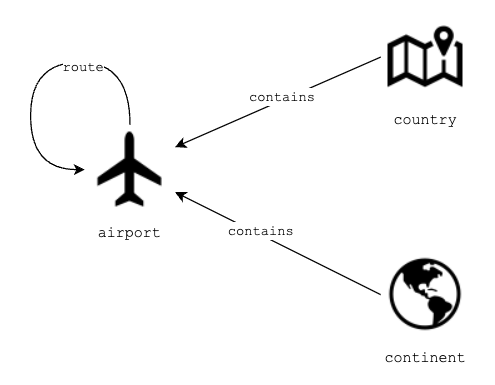

To load this dataset, run the two cells below.  This first cell will setup a few python variables using the configuration parameters of this Neptune Notebook.  The second cell will use Neptune Analytics bulk load feature to load the data from the provided S3 bucket.  

**Note:** You only need to do this once. If you have already loaded the data previously you do not need to load it again.

In [ ]:
import graph_notebook as gn
config = gn.configuration.get_config.get_config()

s3_bucket = f"s3://aws-neptune-customer-samples-{config.aws_region}/sample-datasets/gremlin/air-routes/"
region = config.aws_region

Run the following cell to load the data.

In [ ]:
%%oc 

CALL neptune.load({format: "csv", 
                   source: "${s3_bucket}", 
                   region : "${region}"})

Alternatively, you can perform a data load via the %load magic, for example:

In [ ]:
%load  --source s3://aws-neptune-customer-samples-us-east-1/sample-datasets/gremlin/air-routes/ --format csv --region us-east-1 --run

Running the cell below will show some summary statistics about the data in the graph after it is loaded.

In [ ]:
%summary

## Example openCypher Queries

The notebook cells that follow contain various queries that showcase both features of the openCypher query language and features of Neptune Notebooks. Note that either %%oc or %%opencypher may be used to denote that a cell contains an openCypher query.

This notebook does not go into detail on how the openCypher query language works.  If you would like to learn the details of the openCypher query language please look at the [openCypher Language Tutorial](../../04-Language-Tutorials/02-openCypher/01-Basic-Read-Queries.ipynb).

### Show me 50 airports

In [ ]:
%%oc
MATCH (a:airport)
RETURN a.code as Code, a.desc AS Desc, rand() AS r
ORDER BY r
LIMIT 50

### Find the Seattle Airport

In [ ]:
%%oc -d code
MATCH (a:airport {code: 'SEA'})
RETURN a

### Find the places you can fly to from the Seattle Airport

In [ ]:
%%oc -d code
MATCH p=(:airport {code: 'SEA'})-[]->()
RETURN p

## Seeing a visual representation of your query

The results of any openCypher query that returns a path (`MATCH p= ... RETURN p`) or simple list of nodes can be displayed visually. When such queries are run, you will see a `Graph` tab in the query results area alongside the `Console` tab. Specific visualization features will be explained  using examples throughout this notebook. 


### Query visualization hints and settings

Settings can be used to give the visual renderer hints as to how to label the nodes drawn.

You can specify query visualization hints using  `-d`, `-de`, `-l` and `-g` after the `%%oc` or `opencypher` cell "magics". Either one of them can be used to run an openCypher query. The syntax in general is:

`%%opencypher -d $my_vertex_mapping -de $my_edge_mapping -l <max label length> -g <property to group by>`

All of these settings are optional. By default nodes in the visualization display their label's text. 

#### Customize a label's text with -d
The parameter `$my_mapping` refers to a Python variable that you create in a different cell that provides a mapping from a node's label to the name of a property you prefer be used to label nodes in the visualization. For example

`my_vertex_mapping = '{"airport":"city","country":"code"}`

In cases where each node will be labelled usding a single property name the -d option does not require a map. The property name is all that is needed. The same is true for edges and the -de option.

`%%opencypher -d city -de dist`

#### Customize a label's text length with -l
By default labels shown in the visualization are truncated at 10 characters and the last 3 of the ten are replaced by an ellipsis. You can override this setting using the `-l` setting. For example:

`%%opencypher -l 20`

#### Customize a nodes' group with -g to change its color

Nodes in the visualization are colored (grouped) using their labels by default. You can change this using the `-g` option. For example, to group nodes by the `country` property:

`%%opencypher -g country`

Let's take a look at what our visualization looks like if we set the `city` property as the label for our edges and the `dist` property as the label for the edges.  Let us also color the nodes using the `country` property and set the length of the labels to 20 characters.

In [ ]:
my_edge_labels = '{"route":"dist"}'
my_node_labels = '{"airport":"city"}'

In [ ]:
%%oc -d $my_node_labels -de $my_edge_labels -l 20 -g country
MATCH p=(:airport {code: 'SEA'})-[:route]->()
RETURN p

## Next Steps

In this notebook, we have demonstrated how to load data and query that data using Neptune Analytics.  These features are the basic building blocks for Neptune Analytics so we encourage you to experiment with the sample data to further explore all of the features. 

Next, you can follow the links below for more detailed examples of the more advanced features of Neptune Analytics such as:

* [Graph Algorithms](../02-Graph-Algorithms/01-Getting-Started-With-Graph-Algorithms.ipynb) - Graph algorithms provide a mechanism to solve graph problems dealing with path finding, importance/centrality, clustering, and similarity.
* Vector Similarity Search - Vector Similarity Search (VSS) provides a way to combine dense representations of data, stored in embeddings, with sparse stuctured graph representations within openCypher queries to provide a holisitc view into complex data.

Once you have examined some of the features of Neptune Analytics you can then progress to some of the common application patterns and use case examples, which are linked below:

* [Sample Use Cases](../03-Sample-Use-Cases/Overview.ipynb)
* [Sample Use Cases](../04-Sample-Use-Cases/Overview.ipynb)
